In [ ]:
# Description : This model uses an artificial recurrent neural network called Long Term Short Term Memory (LSTM) 
# to predict the closing stock price of (Apple Inc.) using the past 60 day stock price


In [6]:
# Import the libraries

!pip install yfinance
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.4 MB/s eta 0:00:00 0:00:01
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138636 sha256=71ad185ddfff53197610929302a8c3b00007a84a61f9d87b557942eca39b9f52
  Stored in directory: /Users/arnavshukla/Library/Caches/pip/wheels/df/29/bd/2c860b403d4964724adb889d7e1451b2f3e2942603a199279d
Successfully built peewee


In [9]:
# Get the stock quote from Yahoo Finance
df = yf.download('AAPL', start='2012-01-01', end='2024-06-10')

# Show the data
print(df)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.416984   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.483716   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.622308   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.754262   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.734025   
...                ...         ...         ...         ...         ...   
2024-06-03  192.899994  194.990005  192.520004  194.029999  194.029999   
2024-06-04  194.639999  195.320007  193.029999  194.350006  194.350006   
2024-06-05  195.399994  196.899994  194.869995  195.869995  195.869995   
2024-06-06  195.690002  196.500000  194.169998  194.479996  194.479996   
2024-06-07  194.649994  196.940002  194.139999  196.889999  196.889999   

               Volume  
Date         

In [10]:
#Get the no of rows and cols in the dataset
df.shape

(3128, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

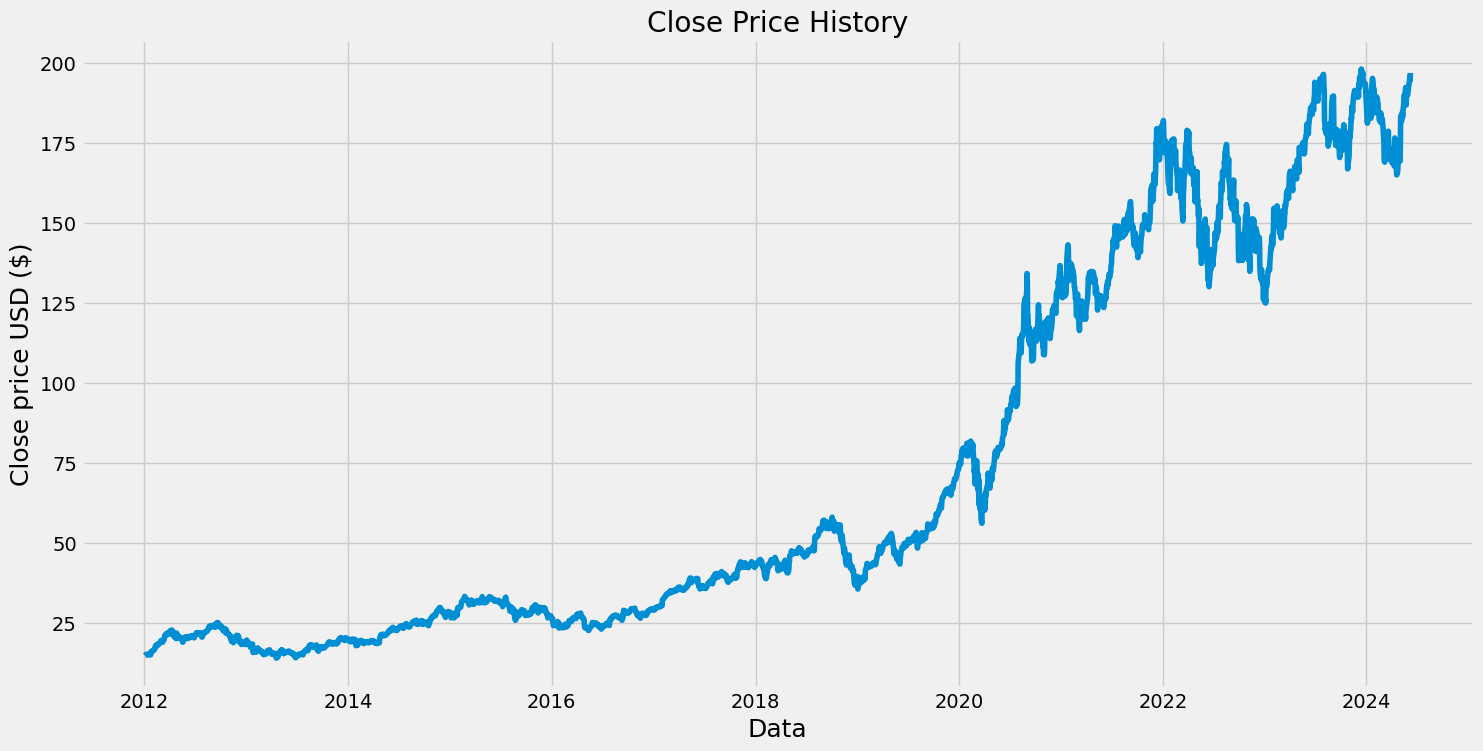

In [11]:
#Visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show

In [12]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe into an array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

2503

In [13]:
#Scale the data (normalisation)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
  

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.9878368 ],
       [0.98028912],
       [0.99337541]])

In [15]:
#Create the training dataset
#Xreate the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train datasets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [17]:
# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [19]:
#Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2443, 60, 1)

In [21]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0037


In [41]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [42]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [43]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(625, 60, 1)

In [44]:
#Get the models prediction price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [45]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7822316040039062

/var/folders/4b/q1mkl3d96jn_zbnnl6ffrl5m0000gp/T/ipykernel_3363/1038276508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


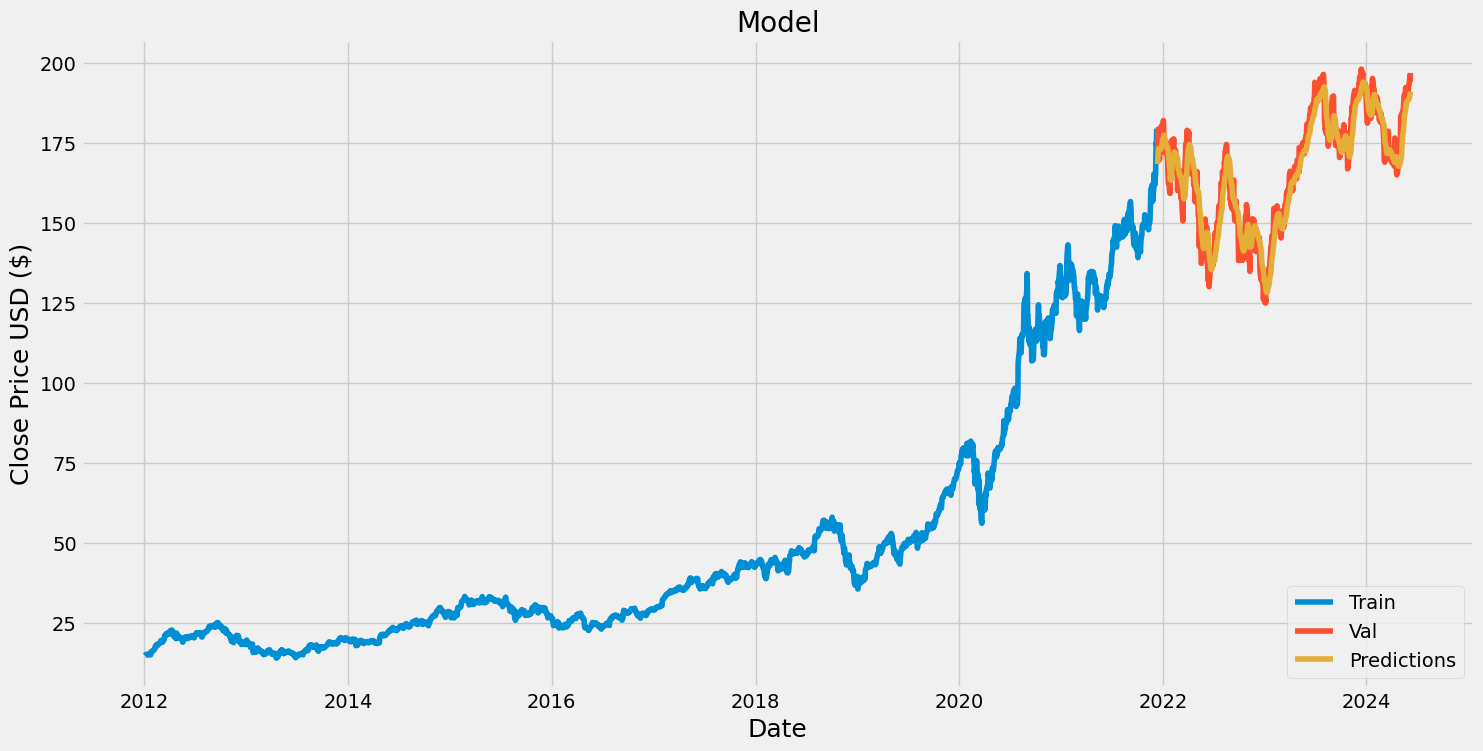

In [46]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [47]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-13,175.740005,168.440109
2021-12-14,174.330002,170.111786
2021-12-15,179.300003,171.348251
2021-12-16,172.259995,172.673935
2021-12-17,171.139999,173.290894
...,...,...
2024-06-03,194.029999,188.782806
2024-06-04,194.350006,189.254959
2024-06-05,195.869995,189.803085


In [58]:
#Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2024-06-03')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[189.80307]]


In [61]:
#Get the quote
apple_quote_2 = yf.download('AAPL', start='2024-06-04', end='2024-06-04')
print(apple_quote_2['Close'])

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-06-04 -> 2024-06-04)')


$AAPL: possibly delisted; No price data found  (1d 2024-06-04 -> 2024-06-04)
Series([], Name: Close, dtype: float64)
